<a href="https://colab.research.google.com/github/akrags1602/Film-Profit-Predictor/blob/main/Films.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [ ]:
dir= pd.read_csv('directors.csv')
mov= pd.read_csv('movies.csv')

In [ ]:
dir.head()

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male


In [ ]:
mov.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
dir.drop('Unnamed: 0', inplace= True, axis=1)
dir.rename(columns={'id':'director_id'}, inplace=True)
dir.fillna({'gender': 'Male'}, inplace=True)
dir.isna().sum()

,0
director_name,0
director_id,0
gender,0


In [ ]:
mov.drop('Unnamed: 0', inplace= True, axis=1)
mov.rename(columns={'id':'movie_id'}, inplace=True)
mov.head()
print(mov.isna().sum())

movie_id        0
budget          0
popularity      0
revenue         0
title           0
vote_average    0
vote_count      0
director_id     0
year            0
month           0
day             0
dtype: int64


In [ ]:
df= pd.merge(dir, mov, left_on= 'director_id', right_on='director_id', how='inner')
df.isna().sum()

,0
director_name,0
director_id,0
gender,0
movie_id,0
budget,0
popularity,0
revenue,0
title,0
vote_average,0
vote_count,0


In [ ]:
df.head()

,director_name,director_id,gender,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day
0,James Cameron,4762,Male,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday
1,James Cameron,4762,Male,43622,200000000,100,1845034188,Titanic,7.5,7562,1997,Nov,Tuesday
2,James Cameron,4762,Male,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,1991,Jul,Monday
3,James Cameron,4762,Male,43879,115000000,38,378882411,True Lies,6.8,1116,1994,Jul,Thursday
4,James Cameron,4762,Male,44184,70000000,24,90000098,The Abyss,7.1,808,1989,Aug,Wednesday


# **Feature Engineering**

Creating new features

In [ ]:
df['profit']=df['revenue']-df['budget']
df.head()

,director_name,director_id,gender,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,profit
0,James Cameron,4762,Male,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,2550965087
1,James Cameron,4762,Male,43622,200000000,100,1845034188,Titanic,7.5,7562,1997,Nov,Tuesday,1645034188
2,James Cameron,4762,Male,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,1991,Jul,Monday,420000000
3,James Cameron,4762,Male,43879,115000000,38,378882411,True Lies,6.8,1116,1994,Jul,Thursday,263882411
4,James Cameron,4762,Male,44184,70000000,24,90000098,The Abyss,7.1,808,1989,Aug,Wednesday,20000098


Highest Grossing Director (10)

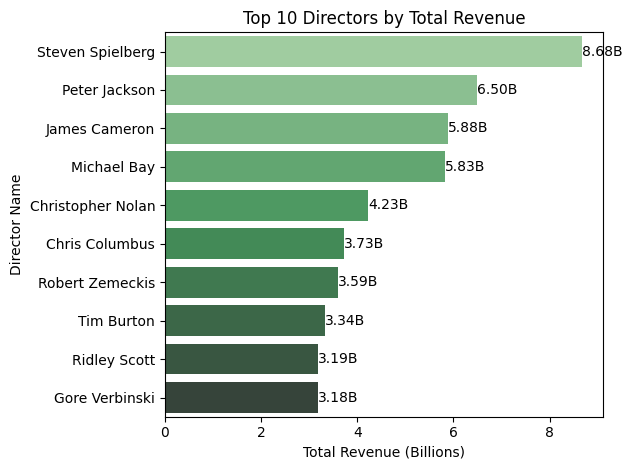

In [ ]:
gross_dir_h= df.groupby('director_name')['revenue'].sum().sort_values(ascending=False).head(10)
gross_dir_bil = gross_dir_h / 10**9
ax = sns.barplot(x=gross_dir_bil.values, y=gross_dir_bil.index, palette='Greens_d')
plt.xlabel('Total Revenue (Billions)')
plt.ylabel('Director Name')
plt.title('Top 10 Directors by Total Revenue')
for index, value in enumerate(gross_dir_bil.values):
    plt.text(value, index, f'{value:.2f}B', color='black', va="center")
plt.tight_layout()
plt.show()

Lowest Grossing Directors (10)

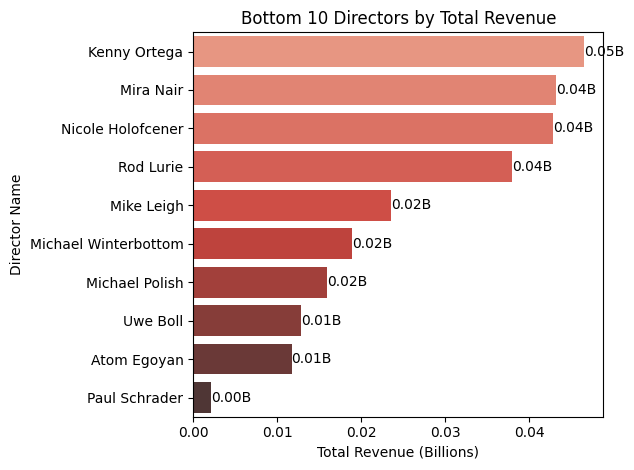

In [ ]:
gross_dir_l= df.groupby('director_name')['revenue'].sum().sort_values(ascending=False).tail(10)
gross_dir_bil_l = gross_dir_l / 10**9
ax1 = sns.barplot(x=gross_dir_bil_l.values, y=gross_dir_bil_l.index, palette='Reds_d')
plt.xlabel('Total Revenue (Billions)')
plt.ylabel('Director Name')
plt.title('Bottom 10 Directors by Total Revenue')
for index, value in enumerate(gross_dir_bil_l.values):
    plt.text(value, index, f'{value:.2f}B', color='black', va="center")
plt.tight_layout()
plt.show()

People's Choice Directors

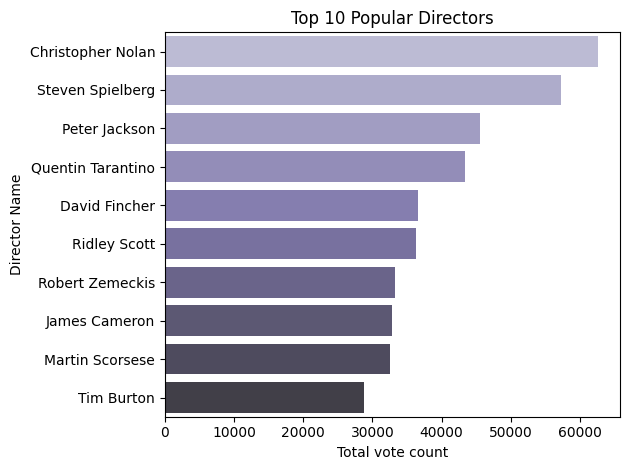

In [ ]:
peo_dir= df.groupby('director_name')['vote_count'].sum().sort_values(ascending=False).head(10)
peo_mov= df.groupby('title')['vote_count'].sum().sort_values(ascending=False).head(10)

ax = sns.barplot(x=peo_dir.values, y=peo_dir.index, palette='Purples_d')
plt.xlabel('Total vote count')
plt.ylabel('Director Name')
plt.title('Top 10 Popular Directors')
plt.tight_layout()
plt.show()

People's Choice Movies

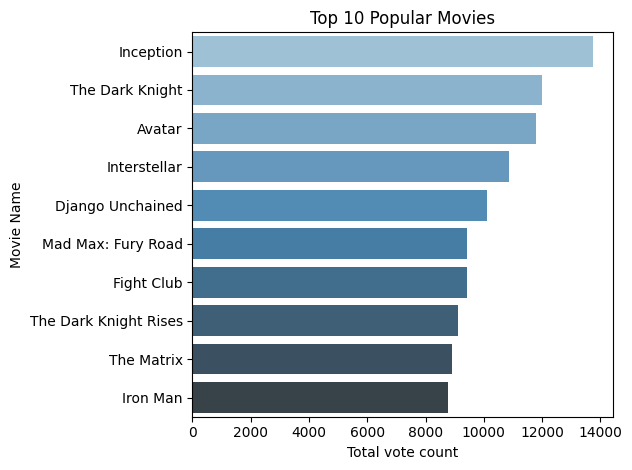

In [ ]:
ax = sns.barplot(x=peo_mov.values, y=peo_mov.index, palette='Blues_d')
plt.xlabel('Total vote count')
plt.ylabel('Movie Name')
plt.title('Top 10 Popular Movies')
plt.tight_layout()
plt.show()

ROI per Gender

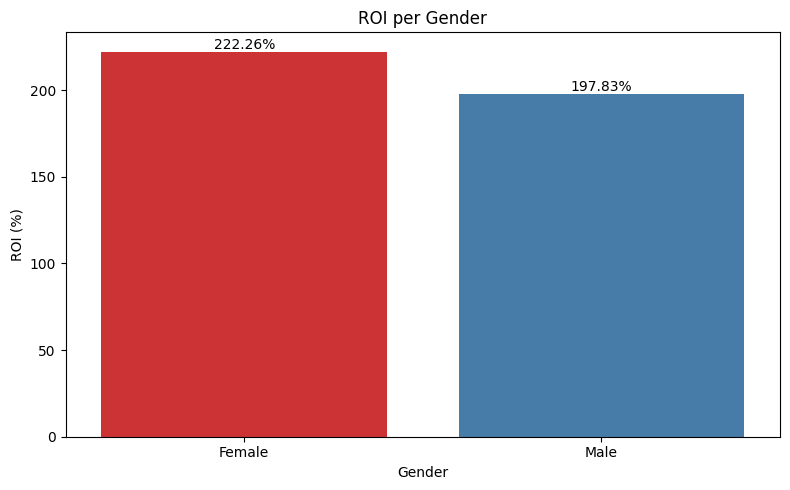

In [ ]:
df1= pd.DataFrame(df.groupby('gender')[['budget','profit','revenue']].sum())
df1['profit_margin']= (df1['profit']/df1['revenue']).round(2)*100
df1['ROI']= df1['profit']/df1['budget'].round()*100

plt.figure(figsize=(8, 5))
ax1 = sns.barplot(x=df1.index, y=df1['ROI'].values, palette='Set1')
plt.xlabel('Gender')
plt.ylabel('ROI (%)')
plt.title('ROI per Gender')
for index, value in enumerate(df1['ROI'].values):
    plt.text(index, value, f'{value:.2f}%', color='black', ha="center", va="bottom")
plt.tight_layout()
plt.show()

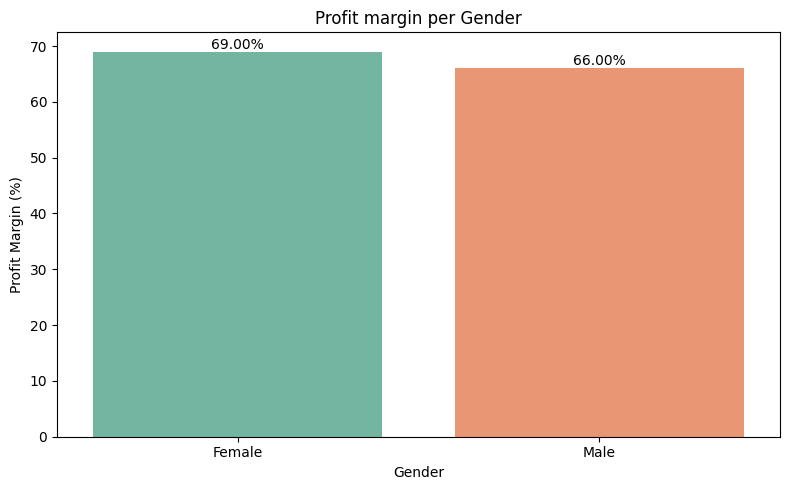

In [ ]:
plt.figure(figsize=(8, 5))
ax2 = sns.barplot(x=df1.index, y=df1['profit_margin'].values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Profit Margin (%)')
plt.title('Profit margin per Gender')
for index, value in enumerate(df1['profit_margin'].values):
    plt.text(index, value, f'{value:.2f}%', color='black', ha="center", va="bottom")
plt.tight_layout()
plt.show()

Highest Profit Margin Periods of a Year

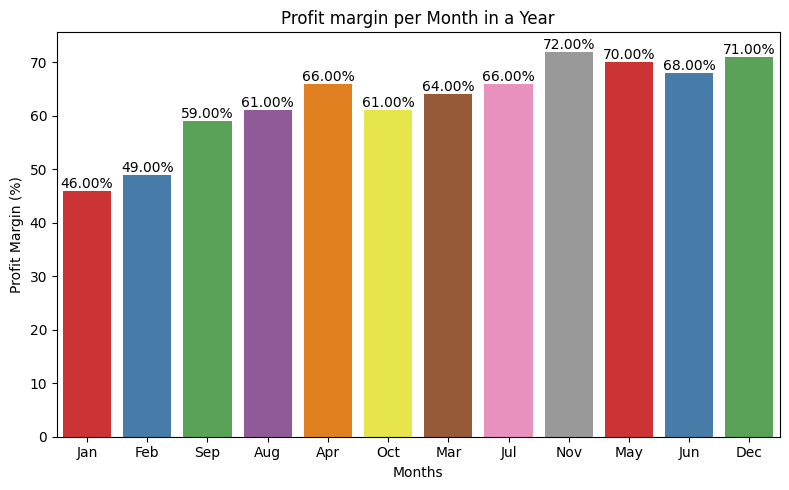

In [ ]:
df2= pd.DataFrame(df.groupby('month')[['budget','revenue','profit']].sum().sort_values(by='profit'))
df2['Budget (Bil)']= (df2['budget']/10**9).round(2)
df2['Revenue (Bil)']= (df2['revenue']/10**9).round(2)
df2['Profit (Bil)']= (df2['profit']/10**9).round(2)
df2['profit_margin']= (df2['profit']/df2['revenue']).round(2)*100
df2['ROI']= (df2['profit']/df2['budget']*100).round()
df2.drop(['budget','revenue','profit'], axis=1, inplace=True)

plt.figure(figsize=(8, 5))
ax2 = sns.barplot(x=df2.index, y=df2['profit_margin'].values, palette='Set1')
plt.xlabel('Months')
plt.ylabel('Profit Margin (%)')
plt.title('Profit margin per Month in a Year')
for index, value in enumerate(df2['profit_margin'].values):
    plt.text(index, value, f'{value:.2f}%', color='black', ha="center", va="bottom")
plt.tight_layout()
plt.show()


ROI Trend Per Month

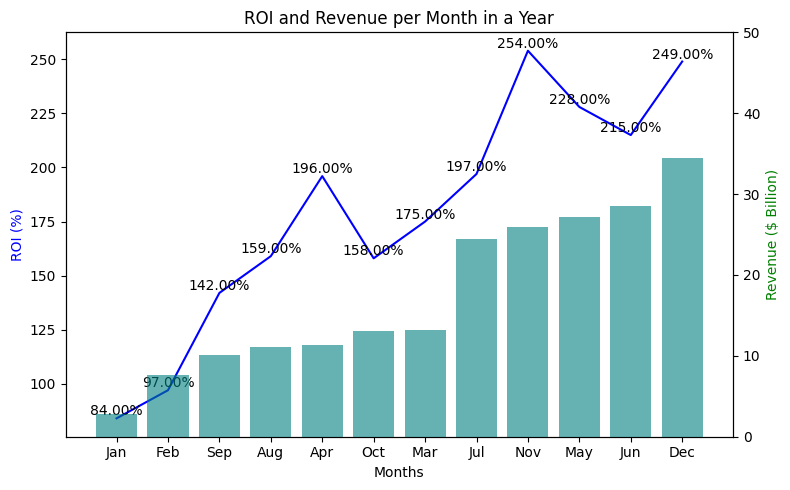

In [ ]:
plt.figure(figsize=(8, 5))

# Plot the ROI (line plot) on the primary y-axis
ax1 = sns.lineplot(x=df2.index, y=df2['ROI'].values, color='blue')
ax1.set_xlabel('Months')
ax1.set_ylabel('ROI (%)', color='blue')
plt.title('ROI and Revenue per Month in a Year')

# Display ROI values on the line plot
for index, value in enumerate(df2['ROI'].values):
    plt.text(index, value, f'{value:.2f}%', color='black', ha="center", va="bottom")

# Create a secondary y-axis for revenue
ax2 = ax1.twinx()  # Create twin axis sharing the same x-axis
ax2.set_ylabel('Revenue ($ Billion)', color='green')
ax2.set_ylim(0, 50)

# Plot Revenue as a bar plot on the secondary y-axis
ax2.bar(df2.index, df2['Revenue (Bil)'].values, color='teal', alpha=0.6)

# Show the chart
plt.tight_layout()
plt.show()

Highest Grossing Films

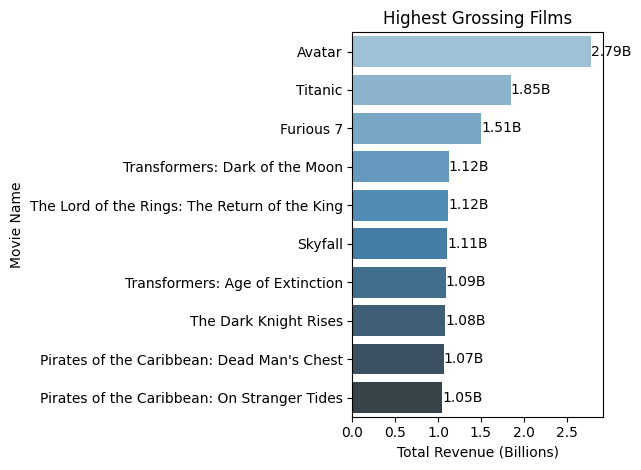

In [ ]:
gross_mov= df.groupby('title')['revenue'].sum().sort_values(ascending=False).head(10)
gross_mov_bil = gross_mov / 10**9
ax = sns.barplot(x=gross_mov_bil.values, y=gross_mov.index, palette='Blues_d')
plt.xlabel('Total Revenue (Billions)')
plt.ylabel('Movie Name')
plt.title('Highest Grossing Films')
for index, value in enumerate(gross_mov_bil.values):
    plt.text(value, index, f'{value:.2f}B', color='black', va="center")
plt.tight_layout()
plt.show()

Highest Profitable Films

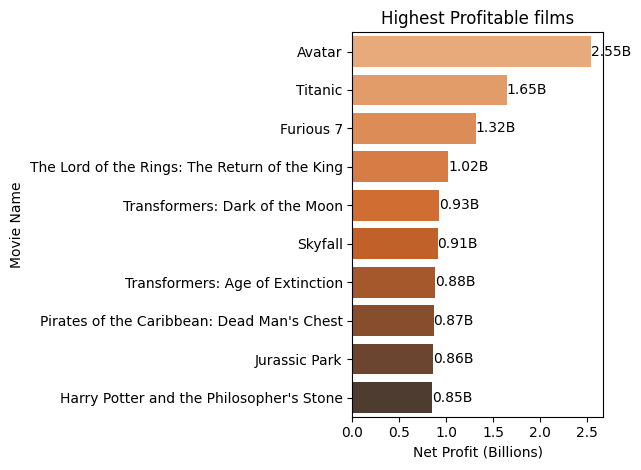

In [ ]:
prof_mov= df.groupby('title')['profit'].sum().sort_values(ascending=False).head(10)
prof_mov_bil = prof_mov / 10**9
ax = sns.barplot(x=prof_mov_bil.values, y=prof_mov.index, palette='Oranges_d')
plt.xlabel('Net Profit (Billions)')
plt.ylabel('Movie Name')
plt.title('Highest Profitable films')
for index, value in enumerate(prof_mov_bil.values):
    plt.text(value, index, f'{value:.2f}B', color='black', va="center")
plt.tight_layout()
plt.show()

Most Profitable Release Days

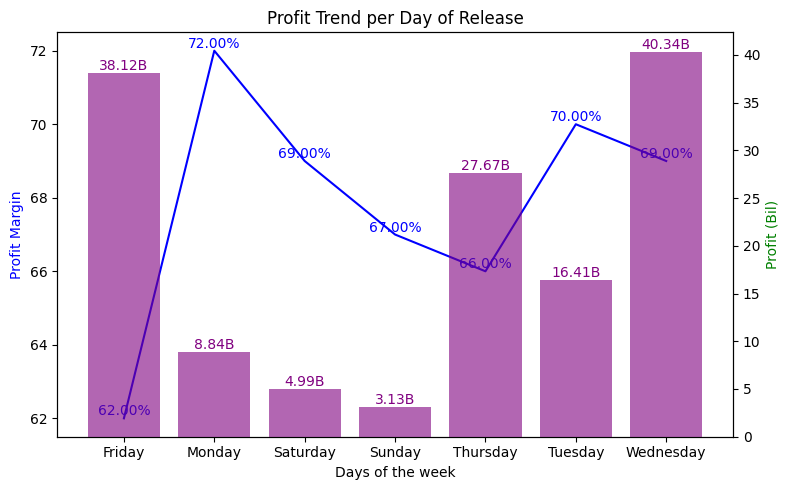

In [ ]:
df3= pd.DataFrame(df.groupby('day')[['budget','revenue','profit']].sum().sort_values(by='day'))
df3['Budget (Bil)']= (df3['budget']/10**9).round(2)
df3['Revenue (Bil)']= (df3['revenue']/10**9).round(2)
df3['Profit (Bil)']= (df3['profit']/10**9).round(2)
df3['profit_margin']= (df3['profit']/df3['revenue']).round(2)*100
df3['ROI']= (df3['profit']/df3['budget']*100).round()
df3.drop(['budget','revenue','profit'], axis=1, inplace=True)

plt.figure(figsize=(8, 5))

# Plot the ROI (line plot) on the primary y-axis
ax1 = sns.lineplot(x=df3.index, y=df3['profit_margin'].values, color='blue')
ax1.set_xlabel('Days of the week')
ax1.set_ylabel('Profit Margin', color='blue')
plt.title('Profit Trend per Day of Release')

# Display ROI values on the line plot
for index, value in enumerate(df3['profit_margin'].values):
    plt.text(index, value, f'{value:.2f}%', color='blue', ha="center", va="bottom")

# Create a secondary y-axis for revenue
ax2 = ax1.twinx()  # Create twin axis sharing the same x-axis
ax2.set_ylabel('Profit (Bil)', color='green')

# Plot Revenue as a bar plot on the secondary y-axis
ax2.bar(df3.index, df3['Profit (Bil)'].values, color='purple', alpha=0.6)
for index, value in enumerate(df3['Profit (Bil)'].values):
    plt.text(index, value, f'{value:.2f}B', color='purple', ha="center", va="bottom")

# Show the chart
plt.tight_layout()
plt.show()

Most Profitable Years for Hollywood Cinema

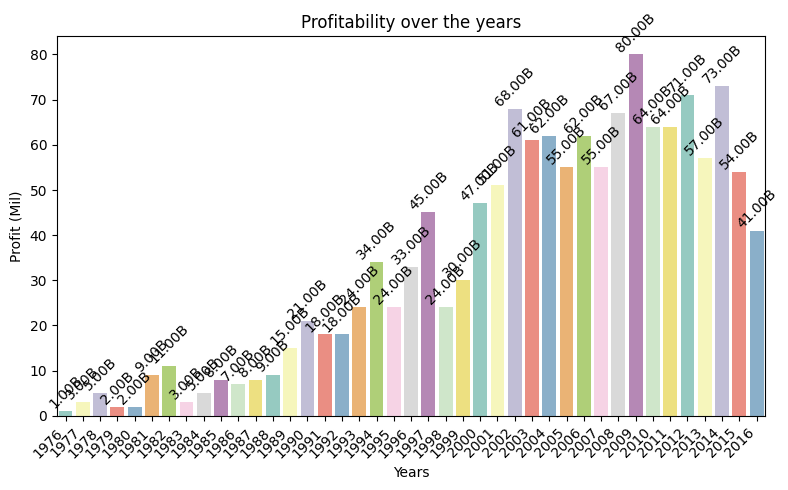

In [ ]:
prof_years= ((df.groupby('year')['profit'].sum())/10**8).round()
plt.figure(figsize=(8, 5))
ax2 = sns.barplot(x=prof_years.index, y=prof_years.values, palette='Set3')
plt.xlabel('Years')
plt.ylabel('Profit (Mil)')
plt.title('Profitability over the years')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(prof_years.values):
    plt.text(index, value, f'{value:.2f}B', color='black', ha="center", va="bottom", rotation=45)
plt.tight_layout()
plt.show()


% Revenue share of movies released in 2010

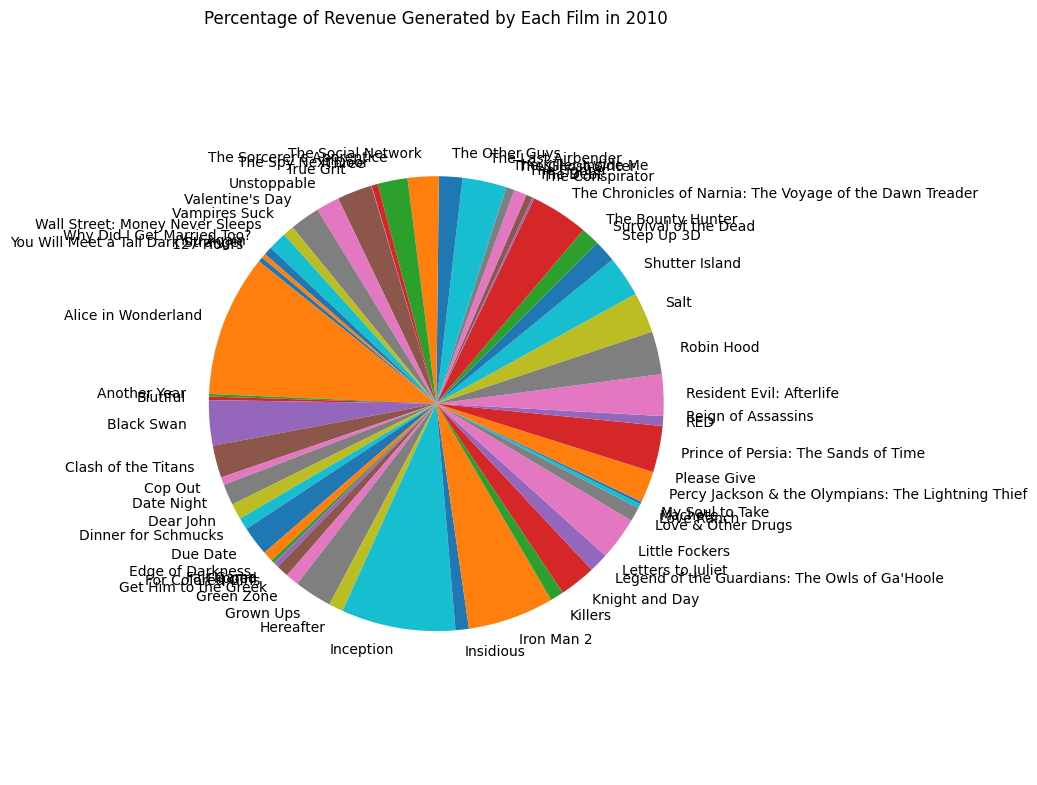

In [ ]:
df_2010= df[df['year']==2010]
mov_dist= ((df_2010.groupby('title')['revenue'].sum())/10**7).round(2)
total_rev_2010 = mov_dist.sum()

# Calculate the percentage of revenue for each film
mov_dist_perc = ((mov_dist / total_rev_2010) * 100).round(2)

plt.figure(figsize=(10, 8))
plt.pie(mov_dist_perc, labels=mov_dist_perc.index, autopct=None, startangle=140)
plt.title('Percentage of Revenue Generated by Each Film in 2010')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.tight_layout()
plt.show()

# **Predictive Modelling**

Correlational Analysis

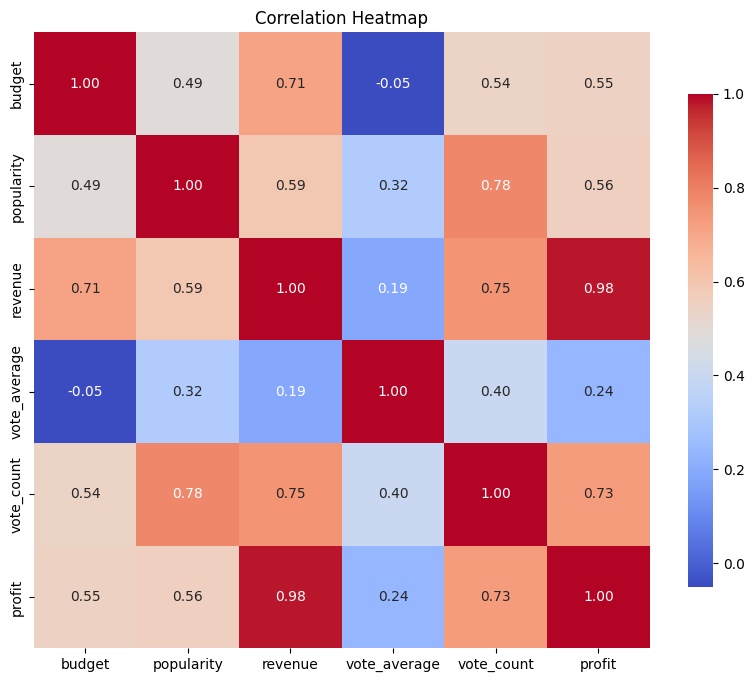

In [ ]:
df4= df.select_dtypes(include=['number'])
df4.drop(['director_id', 'movie_id','year'], axis= 1, inplace= True)
correlation_matrix = df4.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Assuming df is your DataFrame and you want to calculate VIF for its features
X = df4.drop('profit', axis=1)  # Drop the target variable if present
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i).round(2) for i in range(X.shape[1])]

print(vif_data)

        feature   VIF
0        budget  3.78
1    popularity  4.71
2       revenue  4.76
3  vote_average  2.24
4    vote_count  5.81


In [ ]:
df.columns

Index(['director_name', 'director_id', 'gender', 'movie_id', 'budget',
       'popularity', 'revenue', 'title', 'vote_average', 'vote_count', 'year',
       'month', 'day', 'profit'],
      dtype='object')

Creating dummies

In [ ]:
# Convert categorical variables into dummy variables
df_dum = pd.get_dummies(df, columns=['director_name', 'year', 'gender','month', 'day'], drop_first=True)

# Display the new DataFrame with dummy variables
print(df_dum)

      director_id  movie_id     budget  popularity     revenue  \
0            4762     43597  237000000         150  2787965087   
1            4762     43622  200000000         100  1845034188   
2            4762     43876  100000000         101   520000000   
3            4762     43879  115000000          38   378882411   
4            4762     44184   70000000          24    90000098   
...           ...       ...        ...         ...         ...   
1460         6204     46859          0          14    25288872   
1461         6204     47023    6500000          11    13368437   
1462         6204     47524    3000000           5           0   
1463         6204     47962          0           0           0   
1464         6204     48229     250000           1     4186931   

                           title  vote_average  vote_count      profit  \
0                         Avatar           7.2       11800  2550965087   
1                        Titanic           7.5        7562 

In [ ]:
pred = df_dum.drop(['director_id', 'movie_id','title', 'profit'], axis=1)
out = df_dum['profit']
X_tr, X_te, y_tr, y_te = train_test_split(pred, out, test_size=0.2, random_state=42)

Decision Tree Model

In [ ]:
dt = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator= dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

# Fit the model with the training data
grid_search.fit(X_tr, y_tr)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
# Use the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_te)

# Evaluate the model
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
r2 = r2_score(y_te, y_pred)*100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 8126721.369453925
Mean Squared Error: 219142750104747.62
R² Score: 99.24328085847722


Lasso Regression Model

In [ ]:
lasso = Lasso()
parameters = {
    'alpha': np.logspace(-3, 1, 5)
}
grid_search_lasso = GridSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_tr, y_tr)
print("Best parameters:", grid_search_lasso.best_params_)
best_model_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_model_lasso.predict(X_te)

# Evaluate the model
mse_lasso = mean_squared_error(y_te, y_pred_lasso)
r2_lasso = r2_score(y_te, y_pred_lasso)

print("Mean Squared Error for Lasso:", mse_lasso)
print("R^2 Score for Lasso:", r2_lasso)

Best parameters: {'alpha': 10.0}
Mean Squared Error for Lasso: 0.2143798088512267
R^2 Score for Lasso: 1.0


In [ ]:
lasso_coefficients = best_model_lasso.coef_

# Create a DataFrame to show features and their coefficients
selected_features_lasso = pd.DataFrame({
    'Feature': X_tr.columns,
    'Coefficient': lasso_coefficients
})

# Filter to show only selected features (non-zero coefficients)
selected_features_lasso = selected_features_lasso[selected_features_lasso['Coefficient'] != 0]

# Display the selected features
print(selected_features_lasso)

      Feature  Coefficient
0      budget    -1.000000
2     revenue     1.000000
4  vote_count     0.000073


Random Forest Hypertuning

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_tr, y_tr)
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_params_rf}')
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_te)
mse_rf = mean_squared_error(y_te, y_pred_rf)
r2_rf = r2_score(y_te, y_pred_rf)
print(f'Mean Squared Error for Random Forest: {mse_rf:.2f}')
print(f'R^2 Score for Random Forest: {r2_rf:.2f}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Random Forest: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error for Random Forest: 5808312364366100.00
R^2 Score for Random Forest: 0.80
